In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
data=pd.read_csv("Company_Data.csv")

In [4]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoded=LabelEncoder()
data[['ShelveLoc', 'Urban', 'US']]=data[['ShelveLoc', 'Urban', 'US']].apply(LabelEncoder().fit_transform)
data.head(3)

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1

In [10]:
data.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
ShelveLoc    0.157470   0.023350 -0.067678     0.008544   -0.044772  0.014633   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   
Urban       -0.015419   0.066594  0.037967     0.042035   -0.052025  0.047016   
US           0.177093   0.016869  0.089601     0.684460    0.060564  0.057861   

             ShelveLoc       Age  Education     Urban        US  
Sales         0.157470 -0.231815  -0.051955 -0.015419  0.177093  
CompPrice     0.023350 -0.100239   0.025197  0.066594  0.016869  
Income       -0.067678 -0.004670  -0.056855  0.037967  0.089601  
Advertising   0.008544 -0.004557  -0.033594  0.042035  0.684460  
Population   -0.044772 -0.042663  -0.106378 -0.052025  0.060564  
Price         0.014633 -0.102177   0.011747  0.047016  0.057861  
ShelveLoc     1.000000  0.056488   0.001492 -0.063978 -0.039760  
Age           0.056488  1.000000   0.006488  0.028479  0.008652  
Education     0.001492  0.006488   1.000000 -0.033094 -0.078250  
Urban        -0.063978  0.028479  -0.033094  1.000000  0.047085  
US           -0.039760  0.008652  -0.078250  0.047085  1.000000

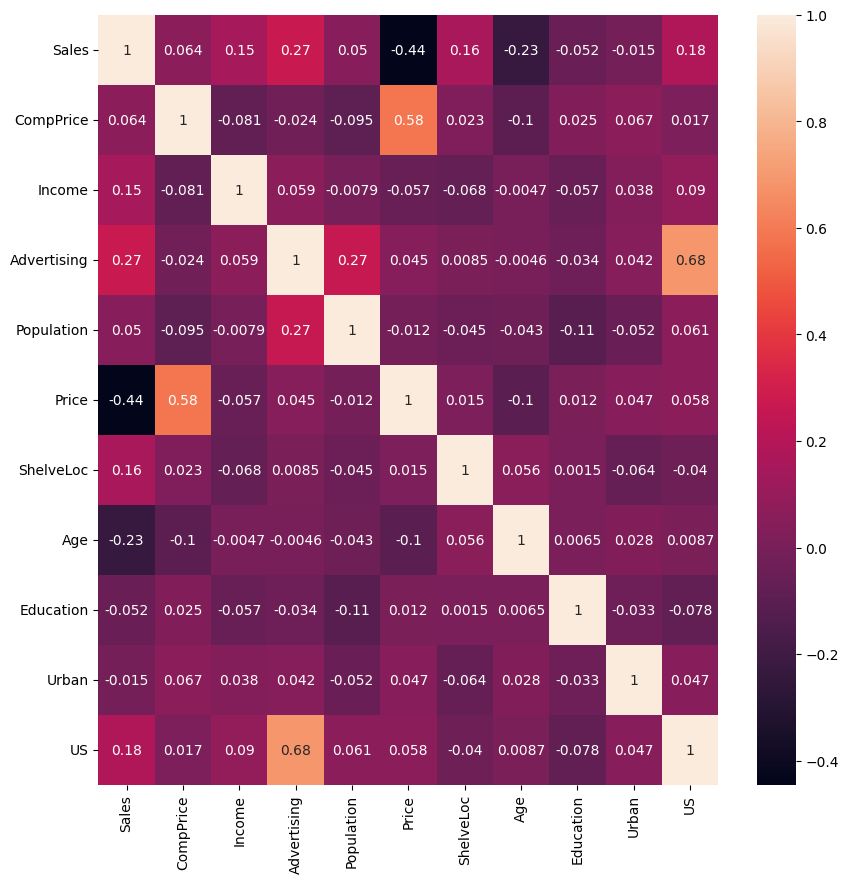

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#if we check the correlation of other attribute with sales, Price has negative moderate correlation with sale.
#Sale is 44% dependent on Price and 27% dependent on Advertising  and 23% dependent on Age
#remaining columns have weak correlation
#we have colinearity here as the independent variable are dependent on each other(compPrice & Price, Advertising &US)


In [12]:
X=data.iloc[:,1:]
Y=data['Sales']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
#Let us build the model

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
model=DecisionTreeRegressor(max_depth=6, criterion='squared_error')
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6)

In [19]:
train_pred=model.predict(X_train)

In [20]:
train_mse=mean_squared_error(Y_train, train_pred)  ##mse
train_mse

1.41668086645646

In [21]:
train_rmse=np.sqrt(train_mse)
train_rmse

1.1902440365137144

In [22]:
test_pred=model.predict(X_test)
test_mse=mean_squared_error(Y_test, test_pred)
test_rmse=np.sqrt(test_mse)
print(test_mse, test_rmse)

4.835124817295675 2.1988917247776607


In [23]:
print("Train mse:", train_mse,'            Test mse:', test_mse)

Train mse: 1.41668086645646             Test mse: 4.835124817295675


In [24]:
print("Train rmse:", train_rmse,'             Test rmse:', test_rmse)

Train rmse: 1.1902440365137144              Test rmse: 2.1988917247776607


In [25]:
#we can observe the training error is 1.41 and the testing error is 4.79

In [26]:
#Let us Vizualize

In [27]:
from sklearn.tree import plot_tree

In [28]:

plt.figure(figsize=(200,100))
plot_tree(model, feature_names=data.columns, filled=True)
plt.show()

Let us use grid search cv and get the parameters and build the model again

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
mod=DecisionTreeRegressor()

param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}]
gsv=GridSearchCV(mod,param_grid, cv=10, verbose=300)


In [31]:
gsv.fit(X_train, Y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START criterion=squared_error, max_depth=1......................
[CV 1/10; 1/40] END criterion=squared_error, max_depth=1;, score=0.095 total time=   0.0s
[CV 2/10; 1/40] START criterion=squared_error, max_depth=1......................
[CV 2/10; 1/40] END criterion=squared_error, max_depth=1;, score=-0.393 total time=   0.0s
[CV 3/10; 1/40] START criterion=squared_error, max_depth=1......................
[CV 3/10; 1/40] END criterion=squared_error, max_depth=1;, score=0.156 total time=   0.0s
[CV 4/10; 1/40] START criterion=squared_error, max_depth=1......................
[CV 4/10; 1/40] END criterion=squared_error, max_depth=1;, score=-0.035 total time=   0.0s
[CV 5/10; 1/40] START criterion=squared_error, max_depth=1......................
[CV 5/10; 1/40] END criterion=squared_error, max_depth=1;, score=0.053 total time=   0.0s
[CV 6/10; 1/40] START criterion=squared_error, max_depth=1......................

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             verbose=300)

In [32]:
gsv.best_params_, gsv.best_score_


({'criterion': 'squared_error', 'max_depth': 5}, 0.38736900610705305)

In [33]:
#Let us build the model again.

In [34]:
final_model=DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')
final_model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [35]:
Y_train_pred=final_model.predict(X_train)

In [36]:
train_mse1=mean_squared_error(Y_train, Y_train_pred)  ##mse
train_rmse1=np.sqrt(train_mse1)

In [37]:
Y_test_pred=final_model.predict(X_test)

In [38]:
test_mse1=mean_squared_error(Y_test, Y_test_pred)  ##mse
test_rmse1=np.sqrt(train_rmse1)

In [39]:
print("Test mse:   ", test_mse1, ' Test rmse:', test_rmse)

Test mse:    4.599810413406727  Test rmse: 2.1988917247776607


In [40]:
print("train mse:   ", train_mse1, ' Train rmse:', train_rmse)

train mse:    2.178195529925671  Train rmse: 1.1902440365137144


In [41]:
plt.figure(figsize=(200,100))
plot_tree(final_model, feature_names=data.columns, filled=True)
plt.show()

RANDOMFOREST

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [43]:
#let us use gridsearchCv and confirm the values
modd=RandomForestRegressor()
param_grid=[{'n_estimators':[80,90,100,200], 'max_features':[2,3,4,5,6]}]
gsv1=GridSearchCV(modd, param_grid, cv=10, verbose=100)

In [44]:
gsv1.fit(X_train, Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 1/10; 1/20] END max_features=2, n_estimators=80;, score=0.616 total time=   0.1s
[CV 2/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 2/10; 1/20] END max_features=2, n_estimators=80;, score=0.472 total time=   0.1s
[CV 3/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 3/10; 1/20] END max_features=2, n_estimators=80;, score=0.401 total time=   0.1s
[CV 4/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 4/10; 1/20] END max_features=2, n_estimators=80;, score=0.490 total time=   0.1s
[CV 5/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 5/10; 1/20] END max_features=2, n_estimators=80;, score=0.447 total time=   0.1s
[CV 6/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 6/10; 1/20] END max_fe

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [80, 90, 100, 200]}],
             verbose=100)

In [45]:
gsv1.best_params_, gsv1.best_score_

({'max_features': 6, 'n_estimators': 100}, 0.6294691713193)

In [46]:
#let us build RandomForest model with these parameters

In [47]:
model_rf=RandomForestRegressor(n_estimators=200, max_features=6)
model_rf.fit(X_train, Y_train)

RandomForestRegressor(max_features=6, n_estimators=200)

In [48]:
tr_pred=model_rf.predict(X_train)
te_pred=model_rf.predict(X_test)

In [49]:
train_mse_rf=mean_squared_error(Y_train, tr_pred)  ##mse
train_rmse_rf=np.sqrt(train_mse_rf)

In [50]:
print('Train mse:',  train_mse_rf, 'Train rmse:', train_rmse_rf)

Train mse: 0.37060131052343764 Train rmse: 0.6087703265792754


In [51]:
test_mse_rf=mean_squared_error(Y_test, te_pred)  ##mse
test_rmse_rf=np.sqrt(test_mse_rf)

In [52]:
print('Test mse:',  test_mse_rf, 'Test rmse:', test_rmse_rf)

Test mse: 3.522435814687493 Test rmse: 1.876815338462336


In [53]:
#training error is very less compred to testing error